<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [34]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


<Axes: xlabel='Industry'>

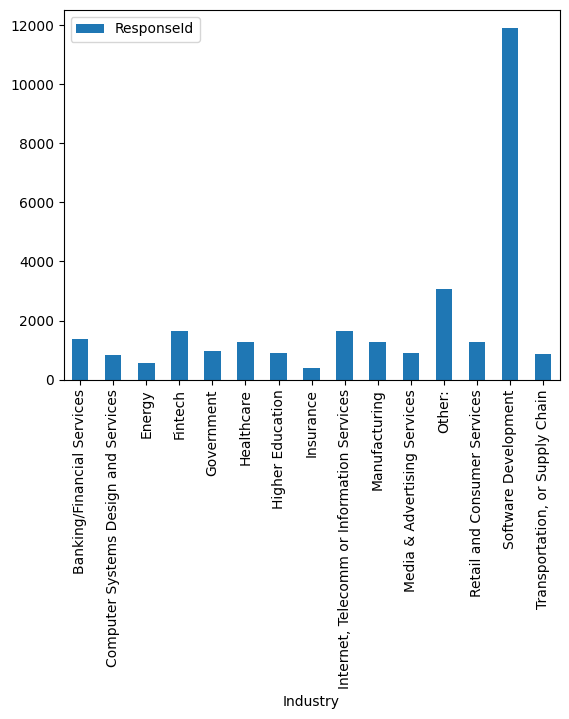

In [4]:
##Write your code here
df.dropna(subset='Industry', axis=0, inplace=True)
dfIndustry = df.groupby('Industry')['ResponseId'].count().to_frame()
dfIndustry.plot(kind='bar')

In [5]:
# Software development is by far the most popular

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [6]:
##Write your code here
print(df['ConvertedCompYearly'].describe())
print(df['ConvertedCompYearly'].median())

print("Incomes exceeding 3 standard deviations above the mean: ")
stddev = df['ConvertedCompYearly'].std()
mean = df['ConvertedCompYearly'].mean()
threshold = mean + (stddev * 3)
highCompensation = df[df['ConvertedCompYearly'] > threshold]
print(highCompensation[['ResponseId', 'ConvertedCompYearly']])

count    1.597600e+04
mean     8.598573e+04
std      1.726376e+05
min      1.000000e+00
25%      3.361300e+04
50%      6.600000e+04
75%      1.082800e+05
max      1.381802e+07
Name: ConvertedCompYearly, dtype: float64
66000.0
Incomes exceeding 3 standard deviations above the mean: 
       ResponseId  ConvertedCompYearly
529           530             650000.0
828           829            1000000.0
1932         1933             945000.0
2171         2172             750000.0
2177         2178             639000.0
...           ...                  ...
37518       37519             900000.0
37930       37931             859250.0
38219       38220            1000000.0
40066       40067             800000.0
41027       41028             700000.0

[63 rows x 2 columns]


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


<Axes: >

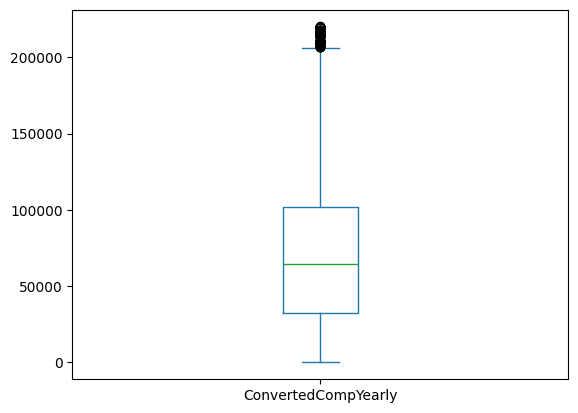

In [8]:
##Write your code here
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
LowerBound = Q1 - 1.5 * IQR
UpperBound = Q3 + 1.5 * IQR
dfNoOutliers = df[(df['ConvertedCompYearly'] >= LowerBound) & (df['ConvertedCompYearly'] <= UpperBound)]
dfNoOutliers['ConvertedCompYearly'].plot(kind='box')

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [11]:
##Write your code here
print(dfNoOutliers)
print(dfNoOutliers.size)

       ResponseId                      MainBranch              Age  \
72             73  I am a developer by profession  18-24 years old   
379           380  I am a developer by profession  35-44 years old   
389           390  I am a developer by profession  25-34 years old   
392           393  I am a developer by profession  35-44 years old   
398           399  I am a developer by profession  45-54 years old   
...           ...                             ...              ...   
41175       41176  I am a developer by profession  18-24 years old   
41178       41179  I am a developer by profession  18-24 years old   
41180       41181  I am a developer by profession  25-34 years old   
41184       41185  I am a developer by profession  45-54 years old   
41186       41187  I am a developer by profession  18-24 years old   

                                              Employment  \
72     Employed, full-time;Student, full-time;Indepen...   
379                                  Em

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [35]:
##Write your code here
df['Age'].replace('Under 18 years old', 18, inplace=True)
df['Age'].replace('18-24 years old', 21, inplace=True)
df['Age'].replace('25-34 years old', 29.5, inplace=True)
df['Age'].replace('35-44 years old', 39.5, inplace=True)
df['Age'].replace('45-54 years old', 49.5, inplace=True)
df['Age'].replace('55-64 years old', 59.5, inplace=True)
df['Age'].replace('65 years or older', 65, inplace=True)

/tmp/ipykernel_2377/3831020208.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace('Under 18 years old', 18, inplace=True)
/tmp/ipykernel_2377/3831020208.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [49]:
df = df[df['Age'] != 'Prefer not to say']
df['Age'] = df['Age'].astype(float)
print(df['Age'].value_counts())

Age
29.5    23911
39.5    14942
21.0    14098
49.5     6249
59.5     2575
18.0     2568
65.0      772
Name: count, dtype: int64


<Axes: >

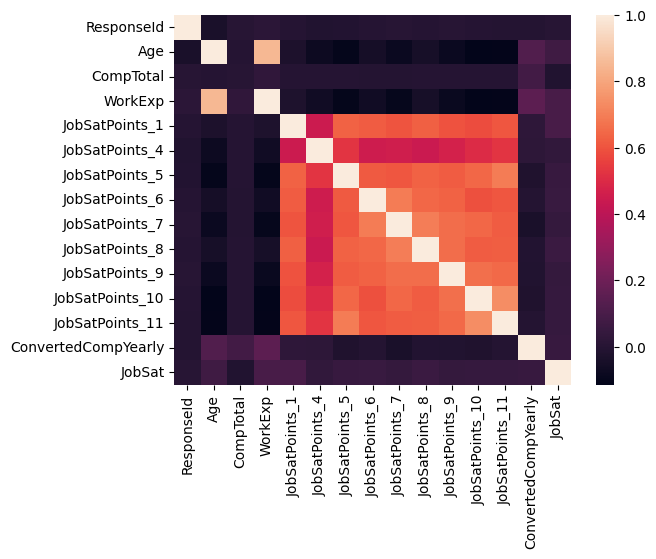

In [50]:
numericdf = df.select_dtypes(include='number')
correlation = numericdf.corr()
sns.heatmap(correlation)

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
